In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns

In [112]:
train=pd.read_csv("C:\\Users\\Neel\\Desktop\\GreyAtom Hackathon\\train.csv")
train.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [140]:
train.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                     int64
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Age                       int64
dtype: object

In [113]:
train=train.drop(["ID","Gender"],1)

In [114]:
train["Claim"].value_counts()

0    49812
1      741
Name: Claim, dtype: int64

In [115]:
train_dummy=pd.get_dummies(train)

In [116]:
X=train_dummy.drop(["Claim"],1)
y=train_dummy["Claim"]

In [117]:
rus = RandomUnderSampler(random_state=0)

In [120]:
X_resampled, y_resampled = rus.fit_resample(X, y)

In [121]:
pd.Series(y_resampled).value_counts()

1    741
0    741
dtype: int64

In [133]:
kmc=KMeans(n_clusters=2)

In [134]:
kmc.fit(X_resampled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [135]:
sampled_X=pd.DataFrame(X_resampled,columns=list(X))

In [136]:
sampled_X["Cluster"]=kmc.predict(X_resampled)

In [146]:
y_pred_kmc=kmc.predict(X_resampled)

In [147]:
accuracy_score(y_resampled,y_pred_kmc)

0.601889338731444

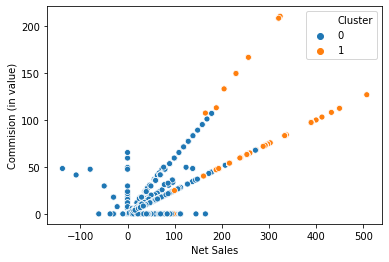

In [148]:
sns.scatterplot(sampled_X["Net Sales"],sampled_X["Commision (in value)"],hue=sampled_X["Cluster"])
plt.show()

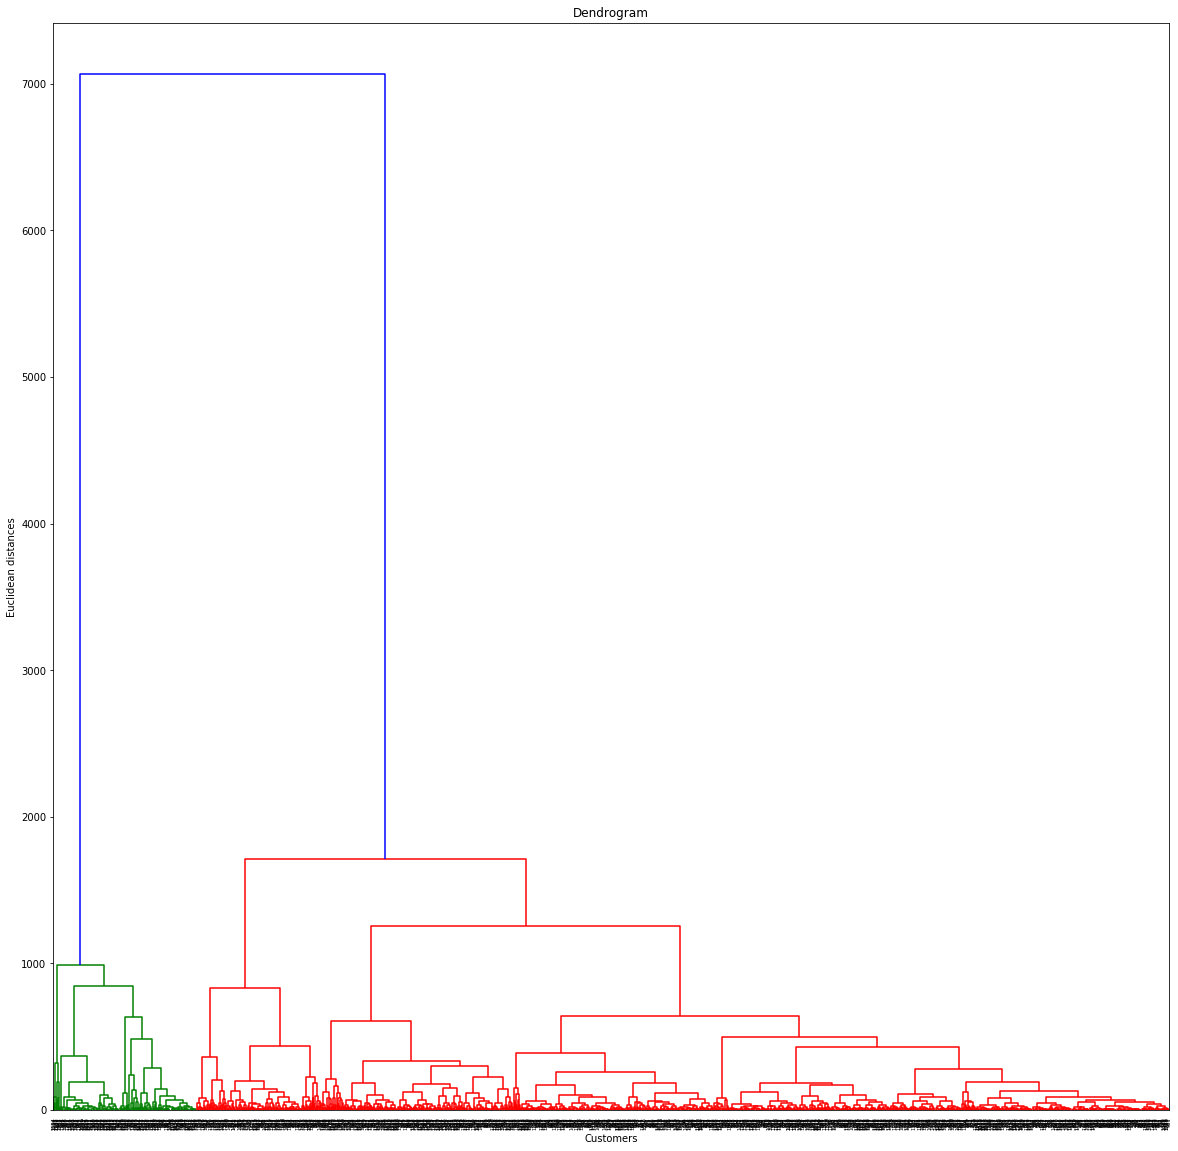

In [149]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,20))
dendrogram = sch.dendrogram(sch.linkage(sampled_X, method = 'ward'))
import matplotlib.pyplot as plt
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [150]:
ac=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [152]:
ac.fit(X_resampled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [154]:
y_pred_ac=ac.fit_predict(X_resampled)

In [155]:
accuracy_score(y_resampled,y_pred_ac)

0.6039136302294197

In [160]:
sampled_X["Cluster Agglomarative"]=y_pred_ac

In [161]:
sampled_X.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA,Cluster,Cluster Agglomarative
0,111.0,67.0,0.00,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,96.0,29.0,0.00,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,6.0,35.1,8.78,71.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,180.0,24.0,0.00,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,16.0,80.0,0.00,49.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


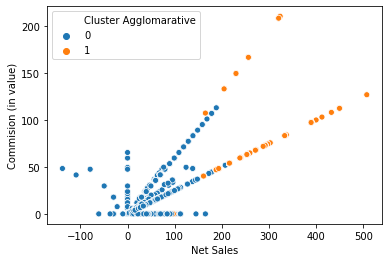

In [162]:
sns.scatterplot(sampled_X["Net Sales"],sampled_X["Commision (in value)"],hue=sampled_X["Cluster Agglomarative"])
plt.show()